In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import math 

In [ ]:
df = pd.read_csv("Sheet 1-Crop_recommendation-1.csv", sep=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            200 non-null    int64  
 1   P            200 non-null    int64  
 2   K            200 non-null    int64  
 3   temperature  200 non-null    float64
 4   humidity     200 non-null    float64
 5   ph           200 non-null    float64
 6   rainfall     200 non-null    float64
 7   label        200 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 12.6+ KB


,N,P,K,temperature,humidity,ph,rainfall,label
0,24,128,196,22.750888,90.694892,5.521467,110.431786,apple
1,7,144,197,23.849401,94.348150,6.133221,114.051250,apple
2,14,128,205,22.608010,94.589006,6.226290,116.039659,apple
3,8,120,201,21.186674,91.134357,6.321152,122.233323,apple
4,20,129,201,23.410447,91.699133,5.587906,116.077793,apple


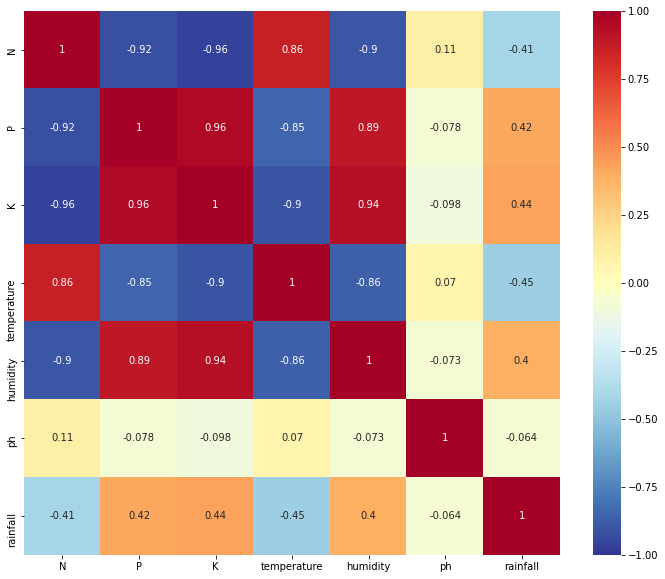

In [ ]:
correlation = df.corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdYlBu_r")

In [ ]:
df.isnull().sum()
x = df.iloc[: , :-1]
y=df['label']
x

,N,P,K,temperature,humidity,ph,rainfall
0,24,128,196,22.750888,90.694892,5.521467,110.431786
1,7,144,197,23.849401,94.348150,6.133221,114.051250
2,14,128,205,22.608010,94.589006,6.226290,116.039659
3,8,120,201,21.186674,91.134357,6.321152,122.233323
4,20,129,201,23.410447,91.699133,5.587906,116.077793
...,...,...,...,...,...,...,...
195,108,94,47,27.359116,84.546250,6.387431,90.812505
196,92,81,52,28.010680,76.528081,5.891414,103.704078
197,110,71,54,28.672089,82.207936,5.725419,94.379875
198,82,75,55,27.345851,78.487384,6.281070,92.155243


In [ ]:
df['label'].value_counts()

apple     100
banana    100
Name: label, dtype: int64

In [ ]:
y = df['label']
X = df.drop(['label'], axis=1, inplace=False)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,24,128,196,22.750888,90.694892,5.521467,110.431786
1,7,144,197,23.849401,94.348150,6.133221,114.051250
2,14,128,205,22.608010,94.589006,6.226290,116.039659
3,8,120,201,21.186674,91.134357,6.321152,122.233323
4,20,129,201,23.410447,91.699133,5.587906,116.077793


#SVM


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 160 samples.
Testing set has 40 samples.


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
SV_classifier = SVC(kernel='linear')
SV_classifier.fit(X_train, y_train)
y_predicted = SV_classifier.predict(X_test)
y_predicted

array(['apple', 'banana', 'banana', 'apple', 'banana', 'banana', 'apple',
       'banana', 'apple', 'banana', 'apple', 'banana', 'banana', 'banana',
       'apple', 'apple', 'apple', 'banana', 'apple', 'apple', 'banana',
       'banana', 'apple', 'banana', 'apple', 'banana', 'banana', 'banana',
       'banana', 'apple', 'apple', 'apple', 'banana', 'banana', 'apple',
       'banana', 'banana', 'apple', 'apple', 'banana'], dtype=object)

In [ ]:
SVM_conf = confusion_matrix(y_test,y_predicted)
print(SVM_conf)
SVM_TP = SVM_conf[1, 1]
SVM_TN = SVM_conf[0, 0]
SVM_FP = SVM_conf[0, 1]
SVM_FN = SVM_conf[1, 0]

[[18  0]
 [ 0 22]]


In [ ]:
SVM_acc=[]
SVM_prec=[]
SVM_recall=[]
SVM_F1=[]
SVM_sens=[]
SVM_spec=[]
SVM_FPR=[]
SVM_FNR=[]
SVM_NPV=[]
SVM_FDR=[]
SVM_MCC=[]
j=0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print(j)

Training set has 160 samples.
Testing set has 40 samples.
2


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
SV_classifier = SVC(kernel='linear')
SV_classifier.fit(X_train, y_train)
y_predicted = SV_classifier.predict(X_test)
y_predicted

array(['apple', 'banana', 'banana', 'apple', 'banana', 'banana', 'apple',
       'banana', 'apple', 'banana', 'apple', 'banana', 'banana', 'banana',
       'apple', 'apple', 'apple', 'banana', 'apple', 'apple', 'banana',
       'banana', 'apple', 'banana', 'apple', 'banana', 'banana', 'banana',
       'banana', 'apple', 'apple', 'apple', 'banana', 'banana', 'apple',
       'banana', 'banana', 'apple', 'apple', 'banana'], dtype=object)

In [ ]:
SVM_conf = confusion_matrix(y_test,y_predicted)
print(SVM_conf)
SVM_TP = SVM_conf[1, 1]
SVM_TN = SVM_conf[0, 0]
SVM_FP = SVM_conf[0, 1]
SVM_FN = SVM_conf[1, 0]
b=round(accuracy_score(y_test, y_predicted), 4)
SVM_acc.append(b)
SVM_prec.append(SVM_TP / float(SVM_FP + SVM_TP))
SVM_recall.append(SVM_TP / float(SVM_FN + SVM_TP))
SVM_F1.append(2 * (SVM_prec[j] * SVM_recall[j]) / (SVM_prec[j] +SVM_recall[j]))
SVM_sens.append(SVM_TP / float(SVM_FN + SVM_TP))
SVM_spec.append(SVM_TN / float(SVM_TN + SVM_FP))
SVM_FPR.append(SVM_FP / float(SVM_TN + SVM_FP))
SVM_FNR.append(SVM_FN/ float(SVM_FN + SVM_TP))
SVM_NPV.append(SVM_TN / float(SVM_TN+SVM_FN))
SVM_FDR.append(SVM_FP / float(SVM_FP+SVM_TP))
SVM_MCC.append((SVM_TP*SVM_TN)-(SVM_FP*SVM_FN) /math.sqrt((SVM_TP+SVM_FP)*(SVM_TP+SVM_FN)*(SVM_TN+SVM_FP)*(SVM_TN+SVM_FN)))
j+=1

[[18  0]
 [ 0 22]]


In [ ]:
TrainPerc=[40,30,20]

In [ ]:
data1 = pd.DataFrame({'TraningPercentage':TrainPerc, 'Accuracy':SVM_acc, 'Precison':SVM_prec,'Recall':SVM_recall,'F1-Measure':SVM_F1,'Sensitivity':SVM_sens,
                     'Specificity':SVM_spec,'False Positive Rate(FPR)':SVM_FPR,'False Negative Rate(FNR)':SVM_FNR,'Negative Predictive Value(NPV)':SVM_NPV,
                     'False Discovery Rate(FDR)':SVM_FDR,'Matthews’s correlation coefficient(MCC)':SVM_MCC})
data1.head()

,TraningPercentage,Accuracy,Precison,Recall,F1-Measure,Sensitivity,Specificity,False Positive Rate(FPR),False Negative Rate(FNR),Negative Predictive Value(NPV),False Discovery Rate(FDR),Matthews’s correlation coefficient(MCC)
0,40,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1599.0
1,30,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,899.0
2,20,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,396.0


In [ ]:
data1 = data1.transpose()

In [ ]:
data1.to_csv(path_or_buf='SVMData.csv')

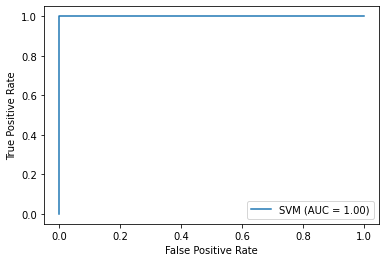

In [ ]:
plot_roc_curve(SV_classifier, X_test, y_test,name='SVM')

#KNN


In [ ]:
KNN_acc=[]
KNN_prec=[]
KNN_recall=[]
KNN_F1=[]
KNN_sens=[]
KNN_spec=[]
KNN_FPR=[]
KNN_FNR=[]
KNN_NPV=[]
KNN_FDR=[]
KNN_MCC=[]
K_Values=['1','1','1']
l=0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print(l)

Training set has 160 samples.
Testing set has 40 samples.
2


In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 100)}
knn_gscv = GridSearchCV(knn, param_grid, cv=20)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 1}

In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors=1)
KNN_classifier.fit(X_train, y_train)
y_predicted = KNN_classifier.predict(X_test)
y_predicted

array(['apple', 'banana', 'banana', 'apple', 'banana', 'banana', 'apple',
       'banana', 'apple', 'banana', 'apple', 'banana', 'banana', 'banana',
       'apple', 'apple', 'apple', 'banana', 'apple', 'apple', 'banana',
       'banana', 'apple', 'banana', 'apple', 'banana', 'banana', 'banana',
       'banana', 'apple', 'apple', 'apple', 'banana', 'banana', 'apple',
       'banana', 'banana', 'apple', 'apple', 'banana'], dtype=object)

In [ ]:
KNN_conf = confusion_matrix(y_test, y_predicted)
print(KNN_conf)
KNN_TP = KNN_conf[1, 1]
KNN_TN = KNN_conf[0, 0]
KNN_FP = KNN_conf[0, 1]
KNN_FN = KNN_conf[1, 0]
q=round(accuracy_score(y_test, y_predicted), 4)
KNN_acc.append(q)
KNN_prec.append(KNN_TP / float(KNN_FP + KNN_TP))
KNN_recall.append(KNN_TP / float(KNN_FN + KNN_TP))
KNN_F1.append(2 * (KNN_prec[l] * KNN_recall[l]) / (KNN_prec[l] +KNN_recall[l]))
KNN_sens.append(KNN_TP / float(KNN_FN + KNN_TP))
KNN_spec.append(KNN_TN / float(KNN_TN + KNN_FP))
KNN_FPR.append(KNN_FP / float(KNN_TN + KNN_FP))
KNN_FNR.append(KNN_FN/ float(KNN_FN + KNN_TP))
KNN_NPV.append(KNN_TN / float(KNN_TN+KNN_FN))
KNN_FDR.append(KNN_FP / float(KNN_FP+KNN_TP))
KNN_MCC.append((KNN_TP*KNN_TN)-(KNN_FP*KNN_FN) /math.sqrt((KNN_TP+KNN_FP)*(KNN_TP+KNN_FN)*(KNN_TN+KNN_FP)*(KNN_TN+KNN_FN)))
l+=1

[[18  0]
 [ 0 22]]


In [ ]:
data2 = pd.DataFrame({'K-Values':K_Values,'TraningPercentage':TrainPerc, 'Accuracy':KNN_acc, 'Precison':KNN_prec,'Recall':KNN_recall,'F1Measure':KNN_F1,'Sensitivity':KNN_sens,
                     'Specificity':KNN_spec,'FPR':KNN_FPR,'FNR':KNN_FNR,'NPV':KNN_NPV,
                     'FDR':KNN_FDR,'MCC':KNN_MCC})
data2.head()

,K-Values,TraningPercentage,Accuracy,Precison,Recall,F1Measure,Sensitivity,Specificity,FPR,FNR,NPV,FDR,MCC
0,1,40,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1599.0
1,1,30,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,899.0
2,1,20,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,396.0


In [ ]:
data2 = data2.transpose()

In [ ]:
data2.to_csv(path_or_buf='KNNData.csv')

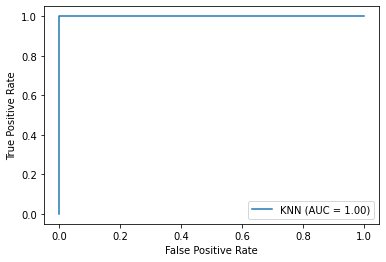

In [ ]:
plot_roc_curve(KNN_classifier, X_test, y_test,name='KNN')